In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv("/content/sample_data/students_adaptability_level_online_education.csv")

In [8]:
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [10]:
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Education Level', 'Institution Type', 'Gender', 'Age', 'Device', 'IT Student', 'Location', 'Financial Condition', 'Internet Type', 'Network Type', 'Flexibility Level']


In [13]:
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Now let's select the intended numerical columns
numeric_features = ['Q1.AI_knowledge', 'Q7.Utility_grade', 'Q8.Advantage_teaching',
                    'Q9.Advantage_learning', 'Q10.Advantage_evaluation',
                    'Q11.Disadvantage_educational_process', 'Q16.GPA']

# Check if all selected features exist in the cleaned column names
# Instead of just checking if the column exists, make sure the data type is numeric
numeric_features = [col for col in numeric_features if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

print("Verified numeric features:", numeric_features)

# Standardize the verified numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Check if numeric_features is not empty before applying scaling
if numeric_features:
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
else:
    print("Warning: No numeric features found for scaling.")


Verified numeric features: []


In [15]:
# Create dummy variables with a prefix for 'Q2.AI_sources' to avoid column name conflicts
# 1. Strip leading/trailing spaces from column names:
df.columns = df.columns.str.strip()

# 2. Check if the column exists before accessing it:
if 'Q2.AI_sources' in df.columns:
    q2_dummies = df['Q2.AI_sources'].str.get_dummies(sep=';').add_prefix('Q2.AI_sources_')
    df = df.join(q2_dummies)
else:
    print("Warning: 'Q2.AI_sources' column not found in DataFrame.")

# Create dummy variables with a prefix for 'Q6.Domains' to avoid column name conflicts
# 1. Strip leading/trailing spaces from column names: This step is already done above.
# 2. Check if the column exists before accessing it:
if 'Q6.Domains' in df.columns:
    q6_dummies = df['Q6.Domains'].str.get_dummies(sep=';').add_prefix('Q6.Domains_')
    df = df.join(q6_dummies)
else:
    print("Warning: 'Q6.Domains' column not found in DataFrame.")


# Drop the original categorical columns, as they are now encoded
# Only drop the columns if they exist
if 'Q2.AI_sources' in df.columns and 'Q6.Domains' in df.columns:
    df = df.drop(['Q2.AI_sources', 'Q6.Domains'], axis=1)

# Display the updated DataFrame
print(df.head())

  Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No     Town   
1      University          Private  Female   23  Mobile         No     Town   
2         College           Public  Female   18  Mobile         No     Town   
3          School          Private  Female   11  Mobile         No     Town   
4          School          Private  Female   18  Mobile         No     Town   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 Mid   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 Mid   Mobile Data           4G          Moderate  
4                Poor   Mobile Data           3G               Low  


In [16]:
print(df.columns)

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')


In [17]:
if 'ID' in df.columns:
    df = df.drop(['ID'], axis=1)

In [18]:
print(df.head())

  Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No     Town   
1      University          Private  Female   23  Mobile         No     Town   
2         College           Public  Female   18  Mobile         No     Town   
3          School          Private  Female   11  Mobile         No     Town   
4          School          Private  Female   18  Mobile         No     Town   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 Mid   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 Mid   Mobile Data           4G          Moderate  
4                Poor   Mobile Data           3G               Low  


In [20]:
from sklearn.preprocessing import StandardScaler


numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [21]:
print(df.head())

  Education Level Institution Type  Gender       Age  Device IT Student  \
0      University          Private    Male  1.018272     Tab         No   
1      University          Private  Female  1.018272  Mobile         No   
2         College           Public  Female  0.160338  Mobile         No   
3          School          Private  Female -1.040771  Mobile         No   
4          School          Private  Female  0.160338  Mobile         No   

  Location Financial Condition Internet Type Network Type Flexibility Level  
0     Town                 Mid          Wifi           4G          Moderate  
1     Town                 Mid   Mobile Data           4G          Moderate  
2     Town                 Mid          Wifi           4G          Moderate  
3     Town                 Mid   Mobile Data           4G          Moderate  
4     Town                Poor   Mobile Data           3G               Low  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


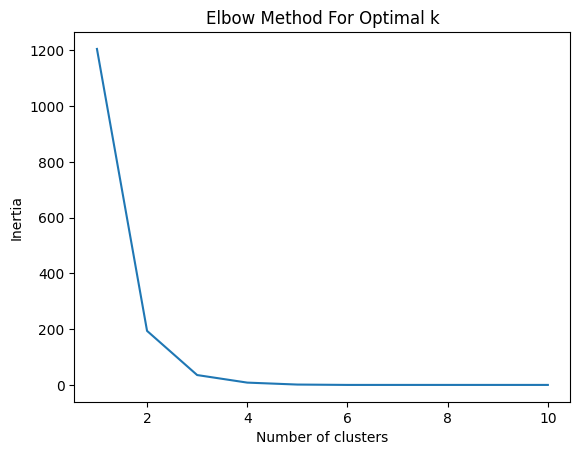

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_features])
    inertia.append(kmeans.inertia_)

# Plotting the inertia values
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# 1. Separate numerical and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# 2. One-Hot Encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
encoded_data = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# 3. Combine numerical and encoded features
processed_df = pd.concat([df[numeric_features], encoded_df], axis=1)

# 4. Scale numerical features (optional but recommended)
scaler = StandardScaler()
processed_df[numeric_features] = scaler.fit_transform(processed_df[numeric_features])

# 5. Now apply KMeans to the processed data
kmeans = KMeans(n_clusters=5, random_state=42) # Choose the desired number of clusters
df['Cluster'] = kmeans.fit_predict(processed_df) # Use the processed data for clustering

# 6. View the clustered data
print(df[['Cluster']].head())

   Cluster
0        0
1        3
2        4
3        1
4        1


In [27]:
cluster_means = df.groupby('Cluster')[numeric_features].mean()
print(cluster_means)

              Age
Cluster          
0        1.042277
1       -1.094392
2        0.740003
3        0.991115
4        0.099282


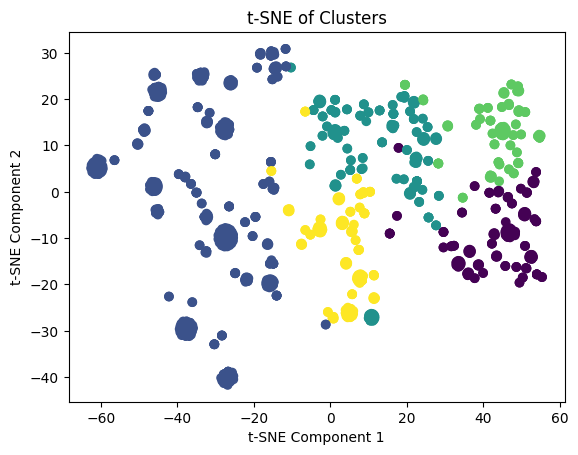

In [29]:
from sklearn.manifold import TSNE
import pandas as pd

# Assuming 'processed_df' from your KMeans clustering step has multiple numerical features:
tsne = TSNE(n_components=2, random_state=42)
# Apply t-SNE to the processed dataframe which has multiple features.
tsne_components = tsne.fit_transform(processed_df)

# Adding the t-SNE components to the original DataFrame
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]

# Plot the t-SNE clusters
import matplotlib.pyplot as plt
plt.scatter(df['TSNE1'], df['TSNE2'], c=df['Cluster'], cmap='viridis')
plt.title('t-SNE of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()